## _"You don't build a business, you build people, and then people build the business"_

                                              - Zig Ziglar 

#### Project and Final Report Created by: Kayla Brock | June 30, 2022

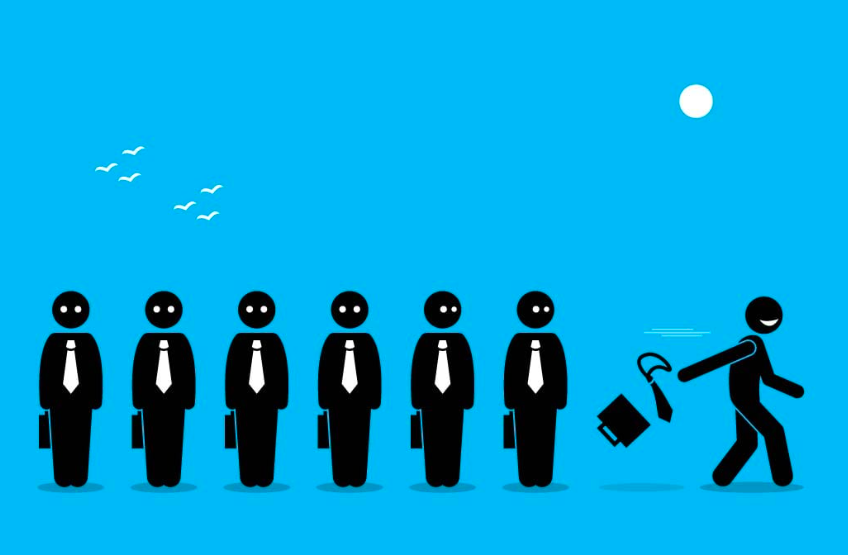

In [1]:
from imports import *

### Project Description

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

_"According to a 2021 study by the Bureau of Labor Statistics, the average annual turnover rate is 57 percent across all industries, which accounts for both voluntary and involuntary turnover. The actual rate of turnover varies greatly by industry, however. Tech companies are at serious risk with an average turnover rate of 20.9 percent, the fourth highest overall behind retail, manufacturing and consumer goods, according to a 2019 study."_

                                                            - Kate Heinz
                                                            - https://builtin.com/recruiting/cost-of-turnover
                                                           

This project aims to uncover the main factors that lead to employee attrition. If the attrition factor is something that can be controlled for, a recommendation will be made. 

I am interested in this project because I believe employee retention is a key component of building a successful business. In the last decade, new successful businesses' have emerged that offer their employees excellent salaries, benefits, stock-options, and working conditions. Even though this dataset is  ficticious, I believe it was carefully designed to be a good representation of actual factors of attrition. While the features are limited and there is minimal information about the culture or benefits, it is still possible to identify red flags in _employee self reported satisfaction_. It would be my hope that, if this were a real company, the stakeholders would take these insights seriously and implement the supports or changes necessary to improve the lives of the employees. I wholeheartedly believe Richard Branson when he said, '_if you take care of your workers, they'll take care of your business._'

### Project Goal 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

The goal of this report is to identify drivers of employee attrition so that supports can be put in place to reduce employee attrition. 

### Initial Thoughts and Hypothesis 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

I believe employees who report a low satisfaction with their environment are more likely to quit. I believe people who are paid less are more likely to quit. I believe entry-level employees are more likely to quit. I believe certain job roles have a higher attrition rate than other job roles. I believe employees with stock options are less likely to quit. I believe employees are more likely to quit if they have only been with the company a short period of time.  

### Initial Questions:


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

- Is there a relationship between environment satisfaction and attrition?
- Is there a relationship between hourly rate and attrition? 
- Is there a relationship between Job Level and attrition? 
- Is there a relationship between Job Role and attrition? 
- Is there a relationship between stock options and attrition?
- Is there a relationship between years with company and attrition?

### Executive Summary

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

The goal of this report was to identify drivers of attrition so that supports could be put in place to lower attrition. Through data exploration and testing I have concluded that employees in the following categories are at a higher risk of leaving the company: 

- Job Level One Sales Representatives (42% of employees in this category ended up leaving the company)
- Job Level One Human Resources Employees (30% of employees in this category ended up leaving the company)
- Job Level One Laboratory Technicians (28% of employees in this category ended up leaving the company)
- It should also be noted that Environment Satisfaction was found to have a relationship with attrition and 28% of      Research Directors reported a '1' (the lowest possible score) for 'Environment Satisfaction'


Three classification models were created to predict attrition: decision tree, random forest, and logistic regression. Logistic Regression, with a c-statistic of 50, was ultimately the best model. The train accuracy was 89, validate 87, and finally tested at an accuracy score of 88%. This score beat baseline by four percent. 


I recommend further investigation be done to identify the root cause of the research directors' environment dissatisfaction. (28% of Research Directors selected a 1 on a scale of 1 to 4 under the survey category 'Environment Satisfaction').I also recommend further investigation be conducted on level one sales representatives, level one human resources employees, and level one laboratory technicians. 


# I. ACQUIRE

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

The data for this report was acquired at kaggle.com. You will need a kaggle login to access the data. Once logged in, you may access this dataset by searching 'IBM HR'. For this project, I downloaded the .csv and saved it locally. 

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# II. PREPARE

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

_This dataset has 1,470 non null rows, and 35 columns. The data preparation was minimal for exploration. First, features 'Attrition' and 'OverTime' are converted from 'yes/no' outputs to binary '1/0' outputs. Then features 'EmployeeCount', 'StandardHours', 'Over18', and 'EmployeeNumber' are dropped. These features cannot be used to predict attrition and have no value add to either exploration or modeling. The resulting dataset to be split retained all 1,470 rows and 31 columns_  

In [3]:
prepare.prepare_HR(df)

In [4]:
train, validate, test = prepare.split_HR_data(df)

# III. EXPLORE

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Univariate Exploration

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [5]:
#create variables that split train by attrition value 
left_train = train[train['Attrition'] == 1]
stayed_train = train[train['Attrition'] == 0]

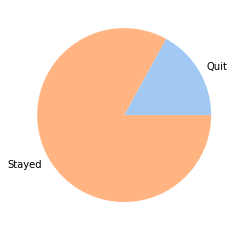

In [6]:
visuals.Current_Attrition_Rate()

_The first thing I wanted to do is look at the current attrition rate. In the training data, which should be a fair representation of all the data, the company retained 690 out of 823 employees. This is almost an 84% retention rate which is excellent for any type of company. I will keep this in mind as I move into bivariate analysis. This company is more in the 'refinement' stage rather than a 'crisis' stage. All 'red flags' should be somewhat minor and possibly more challenging to identify._

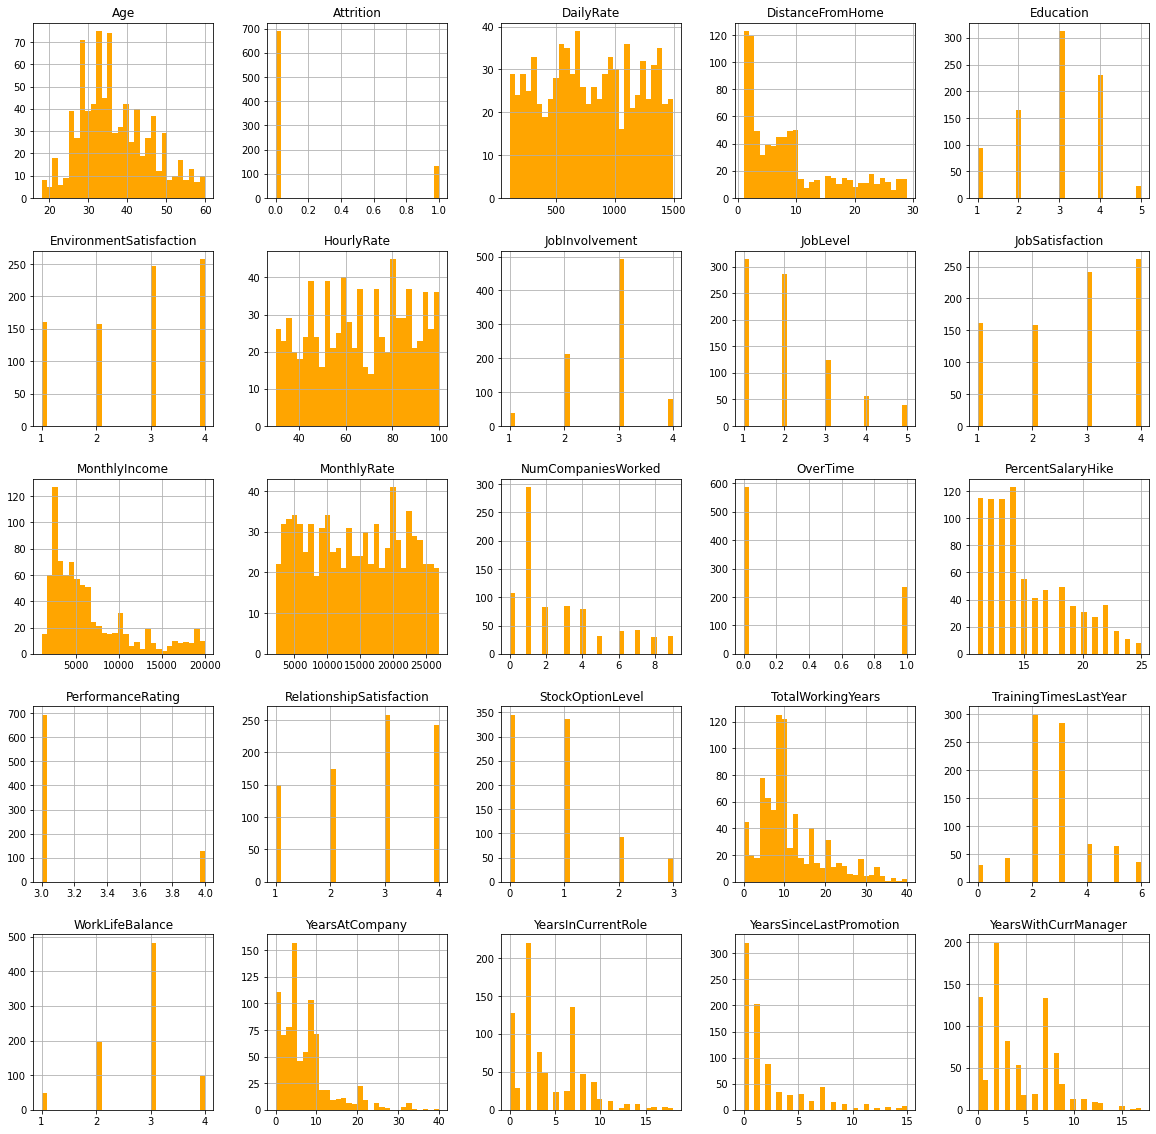

In [11]:
visuals.univariate()

- _Key Takeaways:_ 
    - Age is normally distributed 
    - Attrition appears to be less than 20% 
    - Daily rate roughly appears uniform 
    - Distance from home is right skewed with most employees living less than 10 miles from work 
    - Education is normally distributed 
    - More employees chose an environment satisfaction rating of 3/4 than 1/2
    - Hourly rate roughly appears uniform 
    - Most employees identify as a '3' in the category 'job involvement'
    - Majority of employees are classified as '1 or 2' job level: job level is right skewed 
    - More employees chose a job satisfaction of 3/4 than 1/2 
    - Monthly income right skewed, with most employees earning less 
    - Monthly rate roughly appears uniform 
    - Most employees have worked for one company 
    - Approximately 1/3 of employees participate in overtime 
    - Most employees fall under 15 percent or less for 'percent salary hike': percent salary hike right skewed
    - Most employees have a performance rating of '3'; approximately 14% of employees have a rating of '4'
    - More employees chose a relationship satisfaction of 3/4 than 1/2 
    - Most employees have either no stock option or 1 stock option: stock option level right skewed 
    - Most employees have been with the company for ten years or less: total working years right skewed
    - Most employees had two or three training times last year: training times last year normally distributed 
    - Most employees report a 3 in 'work life balance' 
    - Most employees have been with the company less than 10 years: years at company right skewed 
    - Years in current role, years since last promotion, and years with current manager: right skewed

### Bivariate Analysis

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

Key Questions Answered Through Statistical Testing: 

- Is there a relationship between environment satisfaction and attrition?
- Is there a relationship between hourly rate and attrition? 
- Is there a relationship between Job Level and attrition? 
- Is there a relationship between Job Role and attrition? 
- Is there a relationship between stock options and attrition?
- Is there a relationship between years with company and attrition?

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Question 1: Environment Satisfaction 
    - Is there a relationship between environment satisfaction and attrition?

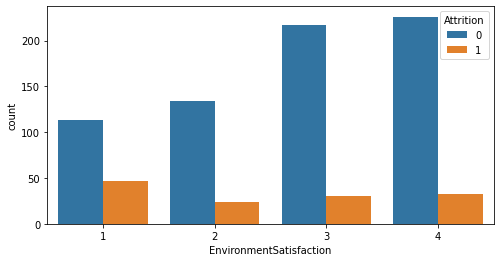

In [12]:
visuals.Environment_Satisfaction_Countplot()

#### Observation: While there are fewer employees that report an environment satisfaction of 1, nearly 40% of these employees end up leaving the company.

### Statistical Testing 

Chi^2 Statistical Testing is selected because Environment Satisfaction Rating and Attrition both fall under the categories: categorical and discrete.

Hypothesis: 
- H0: Attrition is independent of Environment Satisfaction Rating. 
- HA: Attrition is not independent of Environment Satisfaction Rating. 

In [27]:
#set alpha
alpha = 0.05
#create variable pd.crosstab with features to be tested
observed = pd.crosstab(train['EnvironmentSatisfaction'], train.Attrition)
#compute statistic and probability
chi2, p, degf, expected = stats.chi2_contingency(observed)
#print the results 
print(f'chi^2 = {chi2:.4f}')
print(f'p     =  {p:.4f}')
#evaluate the results
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print('We fail to reject the null hypothesis')

chi^2 = 26.3582
p     =  0.0000
We reject the null hypothesis, our data is statistically relevant.


#### _The chi^2 test supports rejecting the null hypothesis: 'Attrition is independent of Environment Satisfaction rating.' Based on this test, 'Environment Satisfaction' will be included as a factor of employee attrition._ 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Question 2: Hourly Rate 
    - Is there a relationship between hourly rate and attrition? 

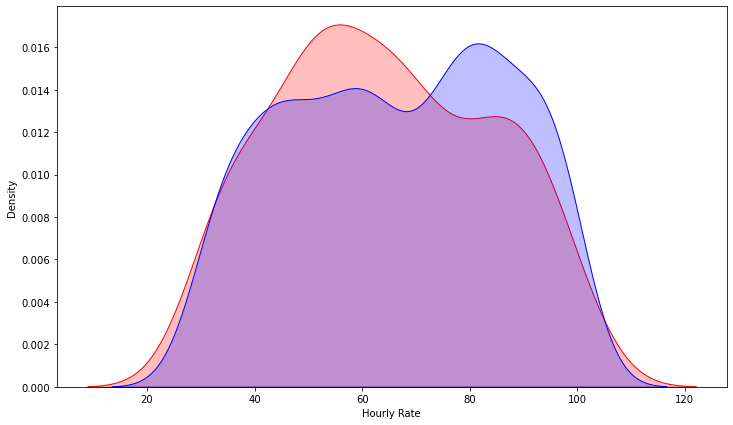

In [14]:
visuals.Hourly_Rate_KDE()

#### Observation: Employees are slightly more likely to leave if they make less than 75 dollars per hour

### Statistical Testing 

T-Test (2 Tailed) Statistical Testing will be conducted because we are using the mean hourly rate of employees who left (subgroup) _compared to_ the mean hourly rate of employees who stayed

- H0: Mean hourly rate of employees who left == Mean hourly rate of employees who stayed 
- HA: Mean hourly rate of employees who left != Mean hourly rate of employees who stayed

In [15]:
#Compare variance 
print(left_train.HourlyRate.var())
print(stayed_train.HourlyRate.var())

383.72784233310523
415.00184893039693


#### Variance not equal, set equal_var to false

In [16]:
#set alpha
alpha = 0.05 
#compute statistic and probability 
t, p = stats.ttest_ind(left_train.HourlyRate, stayed_train.HourlyRate, equal_var = False )
#print results 
print(t, p, alpha)
#evaluate outcome
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print("We fail to reject the null hypothesis")

-1.316352773376399 0.18963166510915605 0.05
We fail to reject the null hypothesis


#### _The T-test fails to reject the null hypothesis: 'Mean hourly rate of employees who left == Mean hourly rate of employees who stayed.' Based on this test, 'Hourly Rate' will be not be included as a factor of employee attrition._ 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Question 3: Job Level 
    -Is there a relationship between Job Level and attrition? 

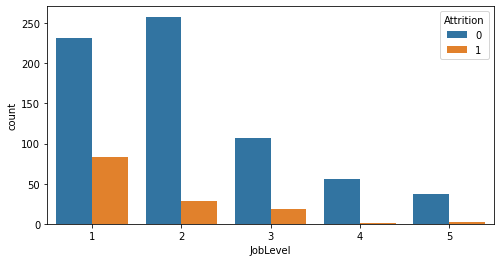

In [17]:
visuals.Job_Level_Countplot()

#### Observation: employees at job level 1 appear to have a higher attrition rate than employees at job levels 2, 3, 4, and 5

### Statistical Testing 

Chi^2 Statistical Testing is selected because Job Level and Attrition both fall under the categories: categorical and discrete.

Hypothesis: 
- H0: Attrition is independent of Job Level. 
- HA: Attrition is not independent of Job Level. 

In [18]:
#set alpha
alpha = 0.05
#create variable pd.crosstab
observed = pd.crosstab(train['JobLevel'], train.Attrition)
#calculate statistic and probability
chi2, p, degf, expected = stats.chi2_contingency(observed)
#print statistic
print(f'chi^2 = {chi2:.4f}')
print(f'p     =  {p:.4f}')
#evluate results
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print('We fail to reject the null hypothesis')

chi^2 = 44.4242
p     =  0.0000
We reject the null hypothesis, our data is statistically relevant.


#### _The chi^2 test supports rejecting the null hypothesis: 'Attrition is independent of Job Level.' Based on this test, 'Job Level' will be included as a factor of employee attrition._ 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Question 4: Job Role 
    -Is there a relationship between Job Role and attrition?

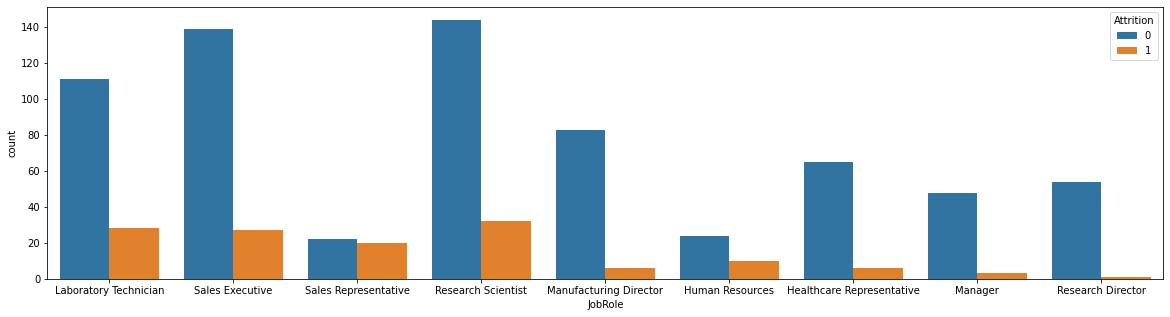

In [19]:
visuals.Job_Role_Countplot()

#### Observation: Sales Representatives appear to have a high turnover 

### Statistical Testing 

Chi^2 Statistical Testing is selected because Job Role and Attrition both fall under the categories: categorical and discrete.

Hypothesis: 
- H0: Attrition is independent of Job Role. 
- HA: Attrition is not independent of Job Role. 

In [20]:
#set alpha
alpha = 0.05
#create variable pd.crosstab with compared features
observed = pd.crosstab(train['JobRole'], train.Attrition)
#calculate statistic and probability
chi2, p, degf, expected = stats.chi2_contingency(observed)
#print results
print(f'chi^2 = {chi2:.4f}')
print(f'p     =  {p:.4f}')
#evaluate results
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print('We fail to reject the null hypothesis')

chi^2 = 58.5136
p     =  0.0000
We reject the null hypothesis, our data is statistically relevant.


#### _The chi^2 test supports rejecting the null hypothesis:  'Attrition is independent of Job Role.'  Based on this test, 'Job Role' will be included as a factor of employee attrition._ 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Question 5: Stock Option Level
       - Is there a relationship between stock options and attrition?

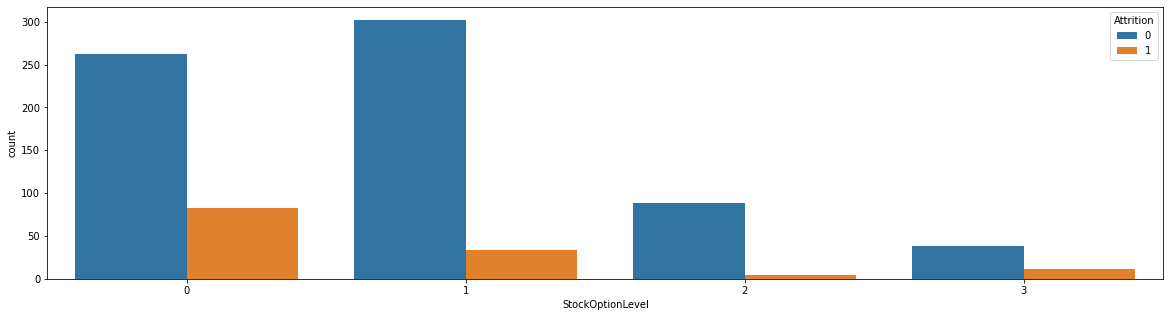

In [21]:
visuals.Stock_Option_Countplot()

#### Observation: Employees without a stock option have a higher attrition rate than those with option levels 1, 2, or 3

### Statistical Testing 

Chi^2 Statistical Testing is selected because Job Role and Attrition both fall under the categories: categorical and discrete.

Hypothesis: 
- H0: Attrition is independent of Stock Option Level. 
- HA: Attrition is not independent of Stock Option Level. 

In [22]:
#set alpha
alpha = 0.05
#create variable pd.crosstab
observed = pd.crosstab(train['StockOptionLevel'], train.Attrition)
#calculate statistic and probability
chi2, p, degf, expected = stats.chi2_contingency(observed)
#print results 
print(f'chi^2 = {chi2:.4f}')
print(f'p     =  {p:.4f}')
#evaluate results
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print('We fail to reject the null hypothesis')

chi^2 = 34.3460
p     =  0.0000
We reject the null hypothesis, our data is statistically relevant.


#### _The chi^2 test supports rejecting the null hypothesis:  'Attrition is independent of Stock Option Level.'  Based on this test, 'Stock Option level' will be included as a factor of employee attrition._ 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Question 6: Years with Company
       - Is there a relationship between years with company and attrition?

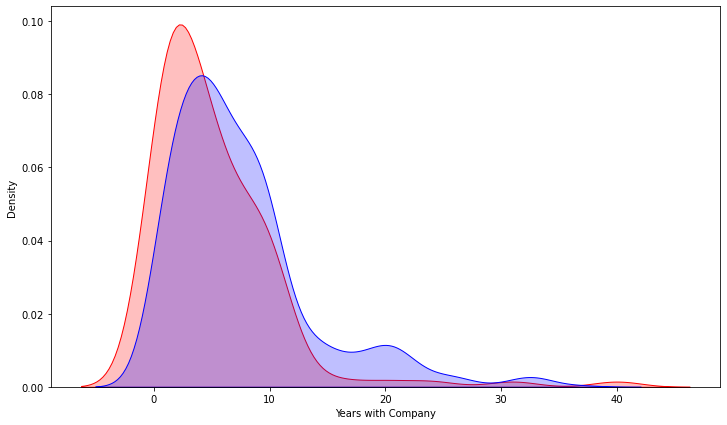

In [23]:
visuals.Years_At_Company_KDE()

#### Observation: It appears more senior employees have a smaller attrition rate

### Statistical Testing 

T-Test (2 Tailed) Statistical Testing will be conducted because we are using the mean years with company of employees who left (subgroup) _compared to_ the mean years with company of employees who stayed

- H0: Mean 'Years at company' of employees who left == Mean 'Years at Company' of employees who stayed 
- HA: Mean 'Years at company' of employees who left != Mean 'Years at Company' of employees who stayed

In [24]:
#Compare variance 
print(left_train.YearsAtCompany.var())
print(stayed_train.YearsAtCompany.var())

31.16940077466392
39.060179634420784


#### Variance not equal, set equal_var to false

In [25]:
#set alpha
alpha = 0.05 
#compute statistic and probability 
t, p = stats.ttest_ind(left_train.YearsAtCompany, stayed_train.YearsAtCompany, equal_var = False )
#print results 
print(t, p, alpha)
#evaluate outcome
if p < alpha: 
    print('We reject the null hypothesis, our data is statistically relevant.')
else: 
    print("We fail to reject the null hypothesis")

-4.314586811537678 2.5054664127457822e-05 0.05
We reject the null hypothesis, our data is statistically relevant.


#### The T-test rejects the null hypothesis:  _"Mean 'Years at company' of employees who left == Mean 'Years at Company' of employees who stayed"_ Based on this test, 'YearsAtCompany' will  be included as a factor of employee attrition.

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Exploration Summary: 

From our univariate analysis we were able to conclude that the current attrition rate is just over 16%. We also notated the distribution of all features. As we moved into bivariate analysis, the attention turned toward using statistical testing to make definitive conclusions before proceeding into modeling. We performed six tests: 4 chi^2 and 2 T-tests. All of the tests returned 'rejecting the null hypothesis' except for one. The features that rejected the null hypothesis included: 'YearsAtCompany', 'JobLevel', 'JobRole', 'StockOptionLevel', and 'Environment Satisfaction'; these will be classified as 'factors of attrition.' The last test, 'Hourly Rate' did not reject the null hypothesis and therefore will not be classified as a factor of attrition. My only concern with these new 'conclusions' is the possible relationship between 'YearsAtCompany' and 'StockOptionLevel.' Because entry level employees at this company have a higher turnover rate, if stock options are only offered to more tenured employees, there is a strong possibility that the relationship between stock option level and employee attrition has more to do with the employee's years at company and less to do with stock options.

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Data Preparation for Modeling 

In [30]:
#encode categorical variables
x_all = prepare.encode_HR_data(df)

In [31]:
#train, validate, test split
train, validate, test = prepare.split_HR_data(x_all)

In [32]:
#split features from target variable in train, validate, test
X_train = train.drop(columns=['Attrition'])
y_train = train.Attrition

X_validate = validate.drop(columns=['Attrition'])
y_validate = validate.Attrition

X_test = test.drop(columns=['Attrition'])
y_test = test.Attrition

In [33]:
#define scaler
scaler = MinMaxScaler()

In [35]:
#transform using scaler X_train, X_validate, X_test
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# IV. Model

### Modeling Confusion Matrix 
- True Positive: Number of occurences where employee left company and employee attrition is predicted true. 
- True Negative: Number of occurences where employee stayed with company and employee attrition is predicted false. 
- False Positive: Number of occurences where employee stayed with company and employee attrition is predicted true.
- False Negative: Number of occurences where employee left company and employee attrition is predicted false.

Classification Machine Learning Algorithms were used to train the training dataset. The metric optimized for is accuracy: number of occurences where employee left company and employee attrition is predicted true.

### SET BASELINE

In [36]:
baseline = y_train.mode()
baseline_pred = (y_train == 0)
baseline_accuracy = baseline_pred.mean()
baseline_accuracy

0.8383961117861483

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### MODEL - DECISION TREE

In [37]:
#create the object 
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

#Fit the model 
clf = clf.fit(X_train, y_train)

In [38]:
# make predictions 
y_pred = clf.predict(X_train)

# estimate probability 
y_pred_proba = clf.predict_proba(X_train)
pd.DataFrame(y_pred_proba, columns = ['Left_train', 'Stayed_train']).head()

,Left_train,Stayed_train
0,0.94,0.06
1,0.20,0.80
2,0.96,0.04
3,0.18,0.82
4,0.94,0.06


### Evaluate Model 

In [39]:
# accuracy 
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.91


In [40]:
# print confusion matrix
confusion_matrix(y_train, y_pred)

array([[681,   9],
       [ 65,  68]])

In [41]:
# view model predictions 
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,681,9
1,65,68


In [42]:
#create a classification report 
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       690
           1       0.88      0.51      0.65       133

    accuracy                           0.91       823
   macro avg       0.90      0.75      0.80       823
weighted avg       0.91      0.91      0.90       823



### Evaluate the Model with Validate 

In [43]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'.format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.81


In [44]:
#predict based off X_validate 
y_pred = clf.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       287
           1       0.47      0.26      0.33        66

    accuracy                           0.81       353
   macro avg       0.66      0.60      0.61       353
weighted avg       0.78      0.81      0.78       353



_The Decision Tree Model returned an accuracy score of 0.81, this is worse than baseline._ 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### MODEL - RANDOM FOREST

In [45]:
#create open list to be added to 
scores = []
#define the range to iterate through
max_value = range(1,21)
#create a for loop to iterate through the hyperparameters creating multiple Random Forest Models
for i in max_value:
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)
    forest = forest.fit(X_train, y_train)
    in_sample_accuracy = forest.score(X_train, y_train)
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    output = {
        'min_samples_per_leaf': n_samples,
        'max_depth': depth,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    scores.append(output)
#convert scores into a pd.DataFrame
df = pd.DataFrame(scores)
#create a feature 'variance' to compare variance of train vs validate results 
df['variance'] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,variance
0,1,1,0.84,0.81,0.03
1,2,2,0.84,0.81,0.03
2,3,3,0.84,0.82,0.03
3,4,4,0.85,0.82,0.04
4,5,5,0.86,0.82,0.04
5,6,6,0.87,0.83,0.05
6,7,7,0.87,0.82,0.05
7,8,8,0.87,0.82,0.04
8,9,9,0.87,0.82,0.04
9,10,10,0.86,0.82,0.04


In [46]:
#make the model 
forest = RandomForestClassifier(max_depth=6, min_samples_leaf=6, random_state=123)
#fit the model
forest = forest.fit(X_train, y_train)
#calculate train accuracy
train_accuracy = forest.score(X_train, y_train)
#calculate validate accuracy
validate_accuracy = forest.score(X_validate, y_validate)
#print accuracy
print(f'train_accuracy: {train_accuracy: 2%}')
print(f'validate_accuracy: {validate_accuracy: 2%}')

train_accuracy:  87.241798%
validate_accuracy:  82.719547%


_The Random Forest Model returned an accuracy score of 87% for in sample data, and 82% for out of sample data for three models. The hyperparameters of these models were: 7 samples per leaf with 7 set as the max_depth, 8 samples per leaf with 8 set as the max_depth, and 9 samples per leaf with 9 set as the max depth. This predict outcome does not beat baseline._

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### MODEL - LOGISTIC REGRESSION

In [47]:
#create open list to append for loop results
metrics = []

# create loop for values in list
for c in [.001, .005, .01, .05, .1, .5, 1, 5, 10, 50, 100, 500, 1000]:
    logit = LogisticRegression(C=c)
    logit.fit(X_train, y_train)
    train_accuracy = logit.score(X_train, y_train)
    validate_accuracy = logit.score(X_validate, y_validate)
    output = {
        'C': c,
        'train_accuracy': train_accuracy,
        'validate_accuracy': validate_accuracy
    }
    
    metrics.append(output)
#convert open list to dataframe
df = pd.DataFrame(metrics)
#create feature 'variance' to compare in sample results to out of sample results
df['variance'] = df.train_accuracy - df.validate_accuracy
df

,C,train_accuracy,validate_accuracy,variance
0,0.00,0.84,0.81,0.03
1,0.01,0.84,0.81,0.03
2,0.01,0.84,0.81,0.03
3,0.05,0.85,0.82,0.03
4,0.10,0.87,0.84,0.03
5,0.50,0.89,0.85,0.03
6,1.00,0.89,0.88,0.01
7,5.00,0.90,0.87,0.03
8,10.00,0.89,0.87,0.02
9,50.00,0.89,0.87,0.02


In [48]:
# make Probability
y_pred = logit.predict(X_train)

# estimate Predictions
y_pred_proba = logit.predict_proba(X_train)

# obtain confusion matrix
print(confusion_matrix(y_train, y_pred))

[[671  19]
 [ 69  64]]


In [49]:
# obtain classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       690
           1       0.77      0.48      0.59       133

    accuracy                           0.89       823
   macro avg       0.84      0.73      0.77       823
weighted avg       0.88      0.89      0.88       823



_The logistic model that performed the best had a c statistic of 1. This model had an accuracy score of 89 on training data, with a score of 88 on validate data. A Score of 88 beats baseline by four percent._

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Testing The Best Performing Model 

In [50]:
#make the model 
logit = LogisticRegression(C=1)
#fit the model
logit.fit(X_train, y_train)
#calculate accuracy of model
test_accuracy = forest.score(X_test, y_test)
#print results
print(f'test_accuracy: {test_accuracy: 2%}')

test_accuracy:  88.775510%


_The logistic regression model was chosen to be used to evaluate the test data. This model had an accuracy score of: 89 on training data,  88 on validate data, and finally 88 percent on test data. A Score of 88 beats baseline by four percent._

### Summary: 
     - Decision Tree and Random Forest Classifier performed worse than baseline 
     - Logistic Regression performed better than baseline and was tested on the test data
     - The logisitic regression model's accuracy was 88.7% on test data; over four percent higher than baseline
    


# Conclusion 

<hr style="border-top: 1px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

###  Employees who rate environment satisfaction = 1

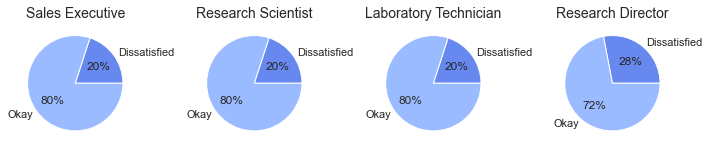

In [52]:
visuals.Employee_Low_Satisfaction_EnvironmentSatisfaction()

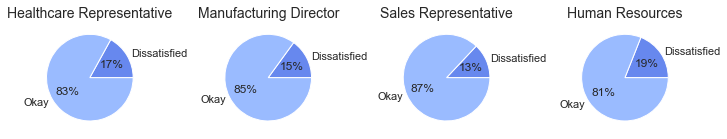

In [53]:
visuals.Employee_Low_Satisfaction_EnvironmentSatisfaction2()

One of the first things that intrigued me about this company was the category _job roles_. Titles like, 'laboratory technician', 'research scientist', 'research director', 'manufacturing director', and 'health representative' gave me the impression this company could be in the business of pharmaceuticals, health supplements, or possibly food. What is even more interesting is the employee's 'environment satisfaction rating.' This might be my bias, but I believe that many people who enter such roles tend to be more serious pragmatic individuals. That being said, when a question of 'environment satisfaction' is posed, and there is a sizeable response of dissatisfaction from the research directors, it begs the question, 'are safety standards being overlooked?' Do the laboratory technicians have all supplies they need? Is the system they are recording their metrics up to date and well supported? . . . There are a million small details under the category 'environment' when it comes to this type of work. Many of these 'details' also are linked to independent inspectors who can possibly pull licensing if standards are not met. The company could also face lawsuits from employees injured or possibly customers if their product is sub-par. At the beginning of this analysis I pointed out that the attrition level of this company is very low and it might be challenging to identify 'red flags.' While I understand this is not a metric that is the closest tie to employee attrition, and I can't for certainty say to the degree attrition would be lowered should the environment drastically improve, I believe from an overall company financial standpoint this is worth looking into. I am certain fixing environmental issues will save the company money in the future even if it is solely based on the number of law suits never received

# Job Level 1 Dissatisfaction

### Level One Research Scientists Analysis 

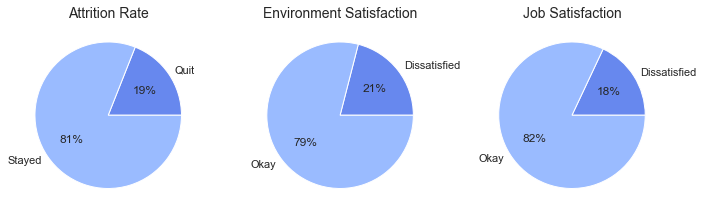

In [54]:
visuals.level_one_ResearchScientists()

### Level One Laboratory Technicians

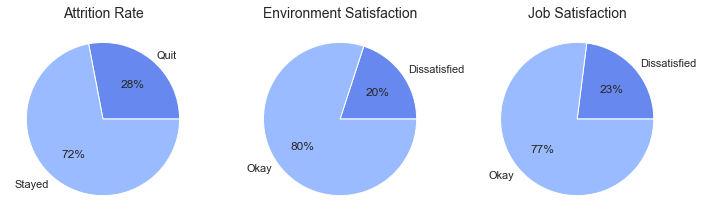

In [55]:
visuals.level_one_LaboratoryTechnicians()

### Level One Sales Representatives 

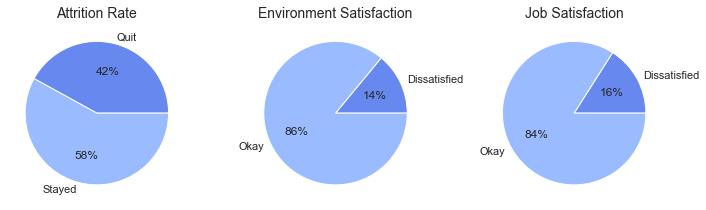

In [56]:
visuals.level_one_SalesRepresentative()

### Human Resources Level One 

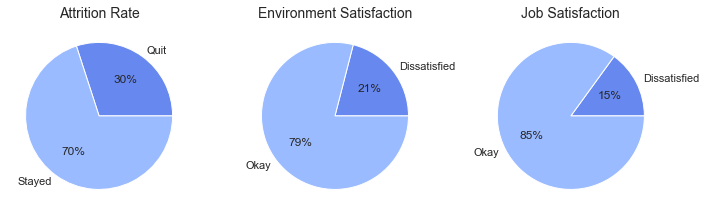

In [57]:
visuals.level_one_HumanResources()

Level one employees are leaving the company at a higher rate than their tenured counterparts. From this data it is easy to decipher the _who_ (Level One Employees) and _which departments_ (Human Resources, Sales Representatives, Laboratory Technicians, and Research Scientists) but impossible to identify the _why._ My hypothesis is that the core issue could be different depending on the department. Further research will need to be conducted to get to the root cause of attrition per department.

### Stock Option Level 

### 43% of Employees have No Stock Options 

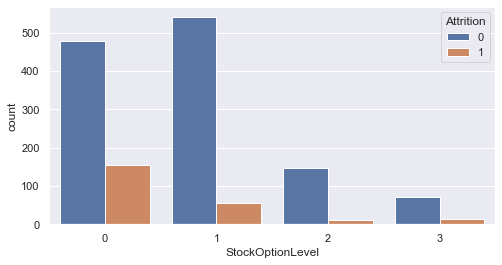

In [58]:
visuals.Stock_Option_countplot()

_Like I noted previously, the relationship between stock option level and employee attrition could be more of a byproduct that this company only offers stock options to employees who are more tenured. (I do not know their policy) If this is not true, and all employees are offered stock options then this is a valuable insight. Human resources would want to focus on hiring individuals who are likely to invest in company stock options._

### Recommendations 

- In Summary I recommend: 
    - to dig deeper into the question of 'Environment Dissatisfaction' for all employees in the research department
    - I also recommend digging deeper into core dissatisfaction issues among level one employees 
    - I recommend Human Resources focus' on hiring individuals who are likely to invest in company stock options. 

### Next Steps

_In the future I hope to evaluate further employee surveys. In the research department, I hope to see a thorough survey done on all aspects of environmental well being. I also hope to do an analysis on all aspects of workplace satisfaction for level one employees. I know with thorough investigation, more supports can be put in place to better support employees._